In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
churnData = pd.read_csv("DATA_Customer-Churn.csv")

In [3]:
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [4]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Since we have empty strings in the TotalCharges column, I couldn't change the dtype to numeric before replacing them with a NaN value. 

In [5]:
churnData.eq(" ").sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
churnData["TotalCharges"] = churnData["TotalCharges"].replace(" ", np.nan)

churnData["TotalCharges"] = pd.to_numeric(churnData["TotalCharges"])

### Checking for null values in the dataframe and replacing them


In [7]:
churnData.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**We notice that we have 11 null values in the TotalCharges column, I will replace them with the mean of the column.**

In [8]:
churnData["TotalCharges"] = churnData["TotalCharges"].fillna(churnData["TotalCharges"].mean())

### Using the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges

In [9]:
X = churnData.loc[:,["tenure","SeniorCitizen","MonthlyCharges","TotalCharges"]]
y = churnData[["Churn"]]

In [10]:
y = y.replace({'Yes': 1, 'No': 0})

### Split the data into a training set and a test set.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Scaling the features using a standard scaler.

In [13]:
scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
y_train = np.array(y_train)

### Fit a K-NN Classifier model on the training data.

In [56]:
def knn_classifier(iterations):
    
    for i in range(1,iterations+1):
        
        model = KNeighborsClassifier(n_neighbors=i,weights='uniform') 
        model.fit(X_train_scaled, y_train.ravel())
        y_pred = model.predict(X_test_scaled)
        y_pred_train=model.predict(X_train_scaled) 

        performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred),
                                        precision_score(y_test, y_pred),
                                        recall_score(y_test, y_pred)]})
    
        pd.options.display.float_format = '{:.2f}'.format
        
        cm = confusion_matrix(y_test,y_pred,labels=model.classes_)
        disp = ConfusionMatrixDisplay(cm)
    
        print("For K=",i,"\n",performance_df,"\n")
        disp.plot()

For K= 1 
   Error_metric  Train  Test
0     Accuracy   0.99  0.73
1    Precision   0.98  0.49
2       Recall   0.98  0.48 

For K= 2 
   Error_metric  Train  Test
0     Accuracy   0.86  0.76
1    Precision   0.98  0.62
2       Recall   0.48  0.29 

For K= 3 
   Error_metric  Train  Test
0     Accuracy   0.86  0.76
1    Precision   0.77  0.56
2       Recall   0.68  0.49 

For K= 4 
   Error_metric  Train  Test
0     Accuracy   0.84  0.78
1    Precision   0.83  0.66
2       Recall   0.47  0.39 

For K= 5 
   Error_metric  Train  Test
0     Accuracy   0.84  0.77
1    Precision   0.74  0.59
2       Recall   0.60  0.49 

For K= 6 
   Error_metric  Train  Test
0     Accuracy   0.83  0.78
1    Precision   0.80  0.66
2       Recall   0.48  0.42 

For K= 7 
   Error_metric  Train  Test
0     Accuracy   0.83  0.78
1    Precision   0.72  0.61
2       Recall   0.55  0.48 

For K= 8 
   Error_metric  Train  Test
0     Accuracy   0.82  0.78
1    Precision   0.75  0.66
2       Recall   0.47  0.40 



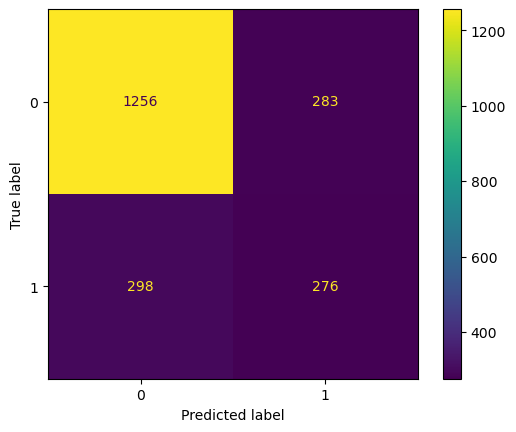

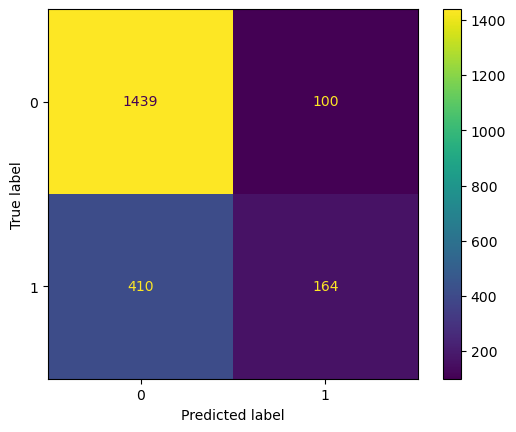

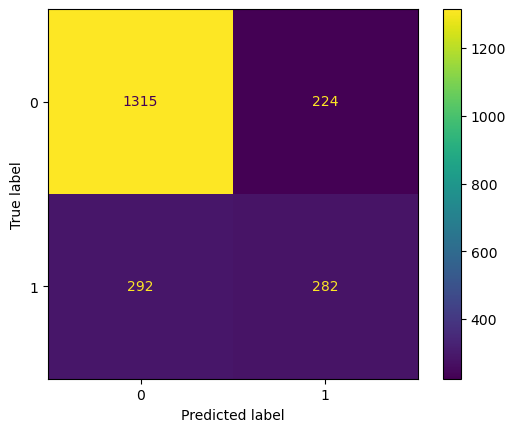

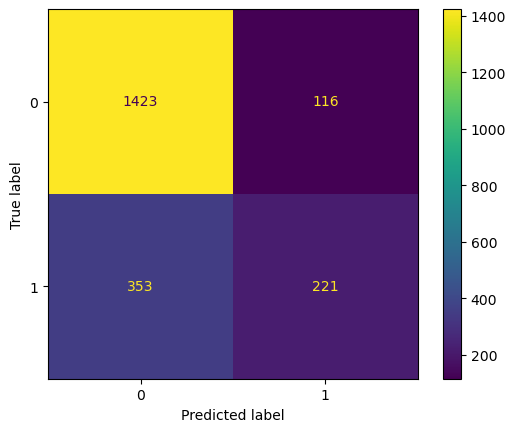

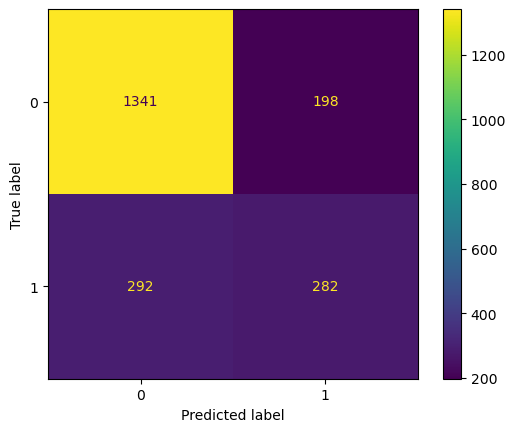

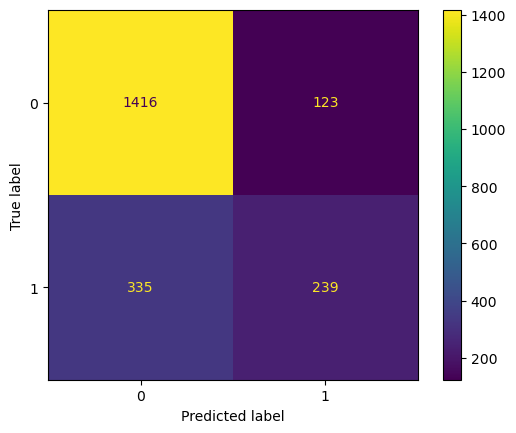

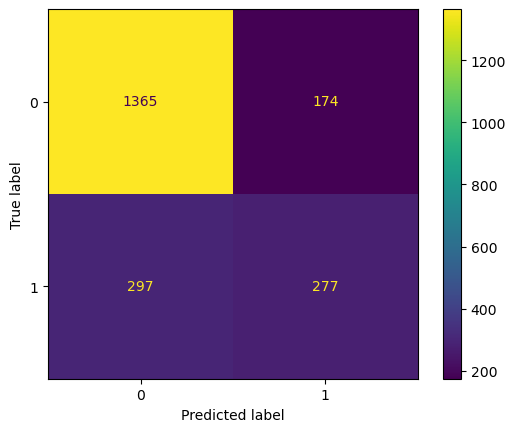

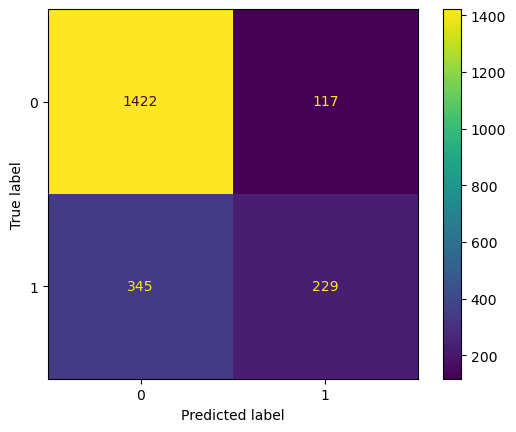

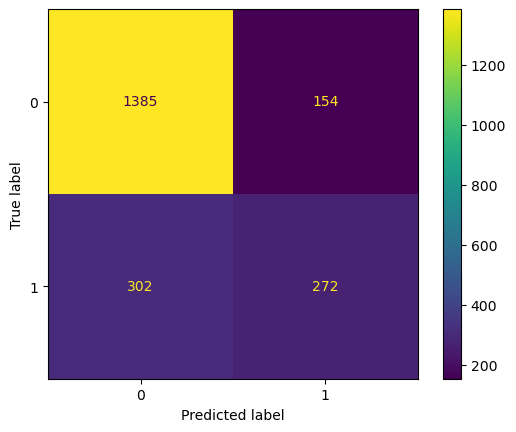

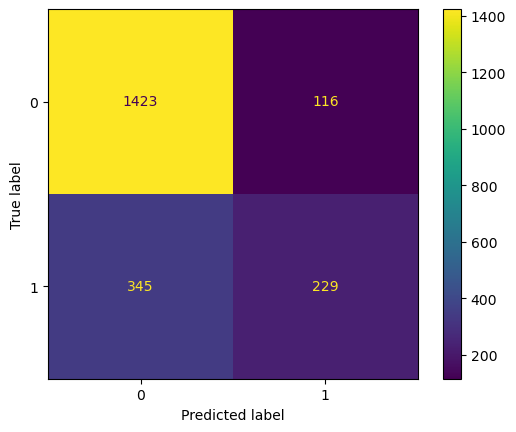

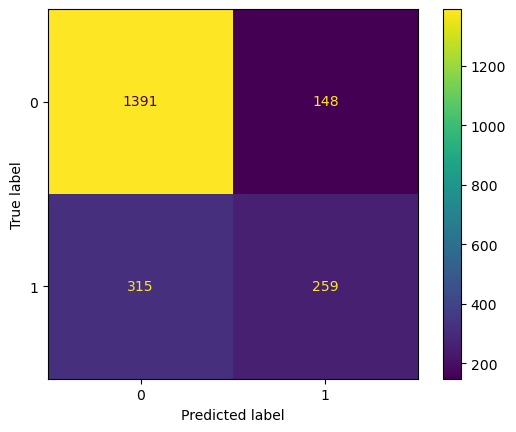

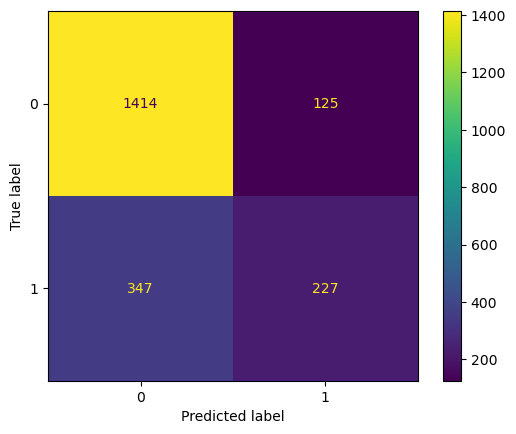

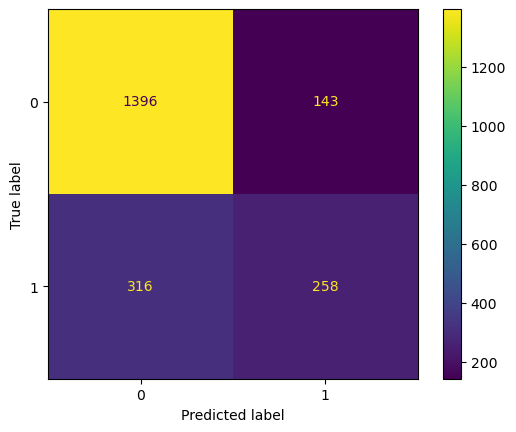

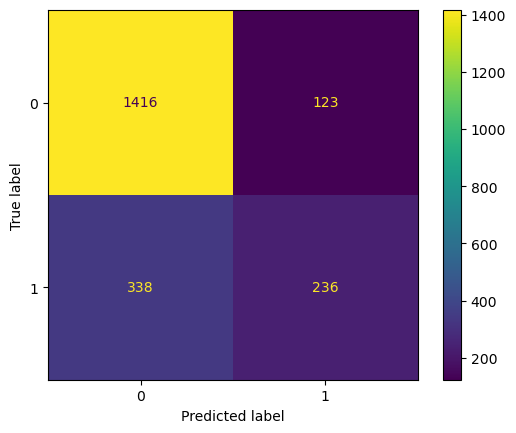

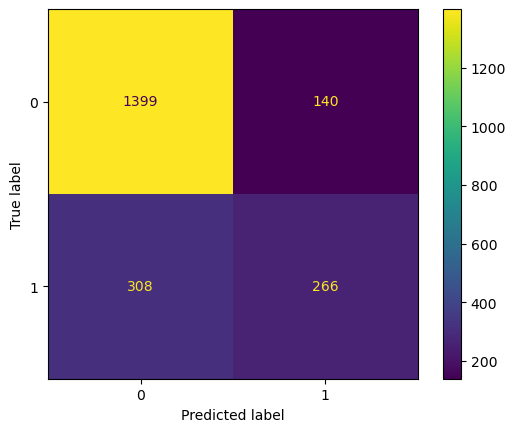

In [57]:
knn_classifier(15)

### Fit a logistic Regression model on the training data.

,Error_metric,Train,Test
0,Accuracy,0.79,0.79
1,Precision,0.65,0.68
2,Recall,0.44,0.45


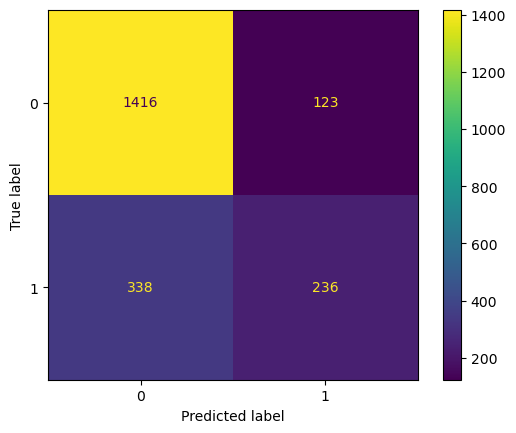

In [52]:
log_model = LogisticRegression()

y_train = np.array(y_train)

log_model.fit(X_train_scaled, y_train.ravel())

y_pred_train_log = log_model.predict(X_train_scaled)
y_pred_test_log = log_model.predict(X_test_scaled)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

cm = confusion_matrix(y_test,y_pred,labels=model.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()